In [1]:
# Tests min and variance to check whether Newcomb's speed of light data is Gaussian or not
# Author : Aleyna Kara
# This file is generated from https://github.com/probml/pmtk3/blob/master/demos/newcombPlugin.m


try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import numpy as np
import requests
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.environ["LATEXIFY"] = ""
os.environ["FIG_DIR"] = "figures"

In [3]:
pml.latexify(width_scale_factor=2)

In [4]:
def plot_posterior(test_val, test_val_true, title, file_name, n_bins=10):
    plt.hist(test_val, n_bins, edgecolor="black", linewidth=0.5)
    plt.axvline(x=test_val_true, c="r")
    plt.title(title)
    sns.despine()
    pml.savefig(f"{file_name}.pdf")

/home/patel_karm/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:69: UserWarning: renaming figures/newcomb-truth2.pdf to figures/newcomb-truth2_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to figures/newcomb-truth2_latexified.pdf
Figure size: [3.  1.5]


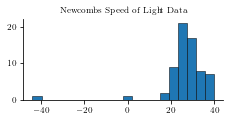

In [5]:
# read data
N_BINS = 20
url = "http://www.stat.columbia.edu/~gelman/book/data/light.asc"
s = requests.get(url).content.decode("utf-8").strip().split("\n")[-7:]
D = np.array(" ".join(s).split(" ")).astype(int)

n, S = D.size, 1000
mu, sigma = np.mean(D), np.std(D)

plt.figure()
plt.hist(D, N_BINS, edgecolor="black", linewidth=0.5)
plt.title("Newcombs Speed of Light Data")
sns.despine()
pml.savefig("newcomb-truth2.pdf")

/home/patel_karm/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:69: UserWarning: renaming figures/newcomb-synth2.pdf to figures/newcomb-synth2_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to figures/newcomb-synth2_latexified.pdf
Figure size: [6. 4.]


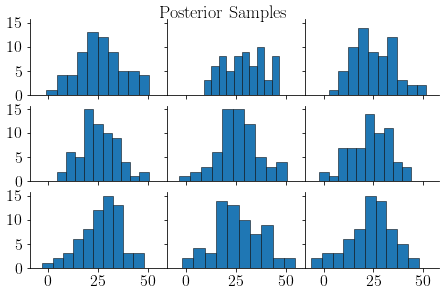

In [6]:
# generate posterior samples
np.random.seed(0)
rep = sigma * np.random.randn(S, n) + mu

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(6, 4))
fig.suptitle("Posterior Samples", fontsize=18)

axes = axes.flatten()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.hist(rep[i, :], 10, edgecolor="black", linewidth=0.5)
    axes[i].tick_params(axis="both", which="major", labelsize=16)
    axes[i].set_xticks([0, 25, 50])
    sns.despine()

plt.yticks([0, 5, 10, 15], labelsize=16, size=16)

pml.savefig("newcomb-synth2.pdf")
plt.show()

/home/patel_karm/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:69: UserWarning: renaming figures/newcomb-test-stat2.pdf to figures/newcomb-test-stat2_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to figures/newcomb-test-stat2_latexified.pdf
Figure size: [3.  1.5]


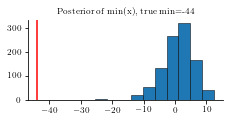

In [7]:
test_val = np.array([np.min(rep[s, :]) for s in range(S)])
test_val_true = np.min(D)
plot_posterior(test_val, test_val_true, f"Posterior of min(x), true min={test_val_true}", "newcomb-test-stat2")

saving image to figures/newcomb-histo-var_latexified.pdf
Figure size: [3.  1.5]


/home/patel_karm/anaconda3/lib/python3.9/site-packages/probml_utils/plotting.py:69: UserWarning: renaming figures/newcomb-histo-var.pdf to figures/newcomb-histo-var_latexified.pdf because LATEXIFY is True
  warnings.warn(


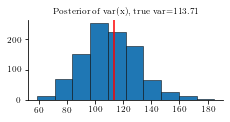

In [8]:
test_val = np.array([np.var(rep[s, :]) for s in range(S)])
test_val_true = np.var(D)
plot_posterior(
    test_val, test_val_true, f"Posterior of var(x), true var={np.round(test_val_true, 2)}", "newcomb-histo-var"
)